In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import torch
from sklearn.metrics import accuracy_score, f1_score
import torch.optim as optim
from torch.utils.data import IterableDataset, DataLoader
import torch.nn as nn
import argparse

# Clustering with data values

In [2]:
df_results = pd.read_csv("clustering_results.csv")
df_sorted = df_results.sort_values(by='f1_macro',ascending = False)
df_results = df_sorted[df_sorted['f1_macro'] > 0]

In [3]:
df_results

,n_clusters,metric,features,undersampling,preprocessing,accuracy,f1_macro,macro_recall
44,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.909184,0.694866,0.694700
100,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.909341,0.693746,0.692679
59,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.917405,0.692307,0.661513
101,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.917043,0.690606,0.661639
52,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,z_score,0.907820,0.689059,0.690349
...,...,...,...,...,...,...,...,...
49,750,euclidean,"n_flows,n_packets,n_bytes",True,z_score,0.885499,0.484605,0.477782
29,750,euclidean,"n_flows,n_packets,n_bytes",False,z_score,0.898391,0.484161,0.453180
41,1250,euclidean,"n_flows,n_packets,n_bytes",False,z_score,0.899263,0.483940,0.453308
33,1500,euclidean,"n_flows,n_packets,n_bytes",False,z_score,0.899360,0.482515,0.452382


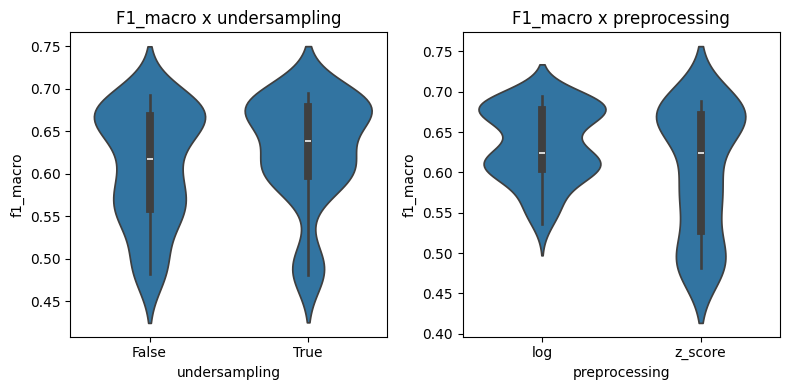

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

for idx, col in enumerate(['undersampling','preprocessing']):
    sns.violinplot(data=df_results, x=col, y='f1_macro', ax=axes[idx])
    axes[idx].set_title(f'{'F1_macro'} x {col}')


plt.tight_layout()
plt.show()

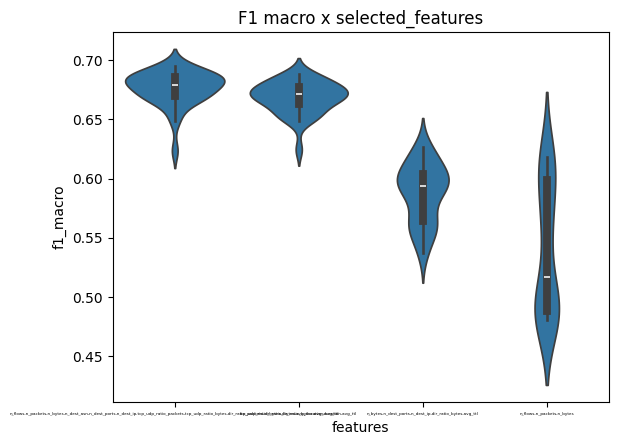

In [5]:
sns.violinplot(data=df_results, x='features', y='f1_macro')
plt.title('F1 macro x selected_features')
plt.xticks(fontsize=3)
plt.show()

In [6]:
print(df_results.groupby('features')['f1_macro'].max())

features
n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes,avg_ttl                                                                                                          0.626229
n_flows,n_packets,n_bytes                                                                                                                                       0.617861
n_flows,n_packets,n_bytes,n_dest_asn,n_dest_ports,n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl    0.694866
tcp_udp_ratio_bytes,dir_ratio_bytes,avg_duration,avg_ttl                                                                                                        0.688143
Name: f1_macro, dtype: float64


# Histogram clustering

In [7]:
df_results = pd.read_csv("histogram_clustering_results.csv")
df_sorted = df_results.sort_values(by='f1_macro',ascending = False)
df_results = df_sorted[df_sorted['f1_macro'] > 0]

In [8]:
df_results.head(10)

,n_clusters,metric,features,undersampling,preprocessing,accuracy,f1_macro,macro_recall
44,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.921519,0.730671,0.729954
68,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,z_score,0.918510,0.726506,0.721124
100,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.918742,0.725622,0.725912
59,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.925670,0.725475,0.698857
22,1500,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.918299,0.725305,0.729044
101,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.924837,0.723222,0.697173
66,1250,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.918997,0.723031,0.727182
57,2000,euclidean,"tcp_udp_ratio_bytes,dir_ratio_bytes,avg_durati...",True,z_score,0.918250,0.721774,0.714584
21,1500,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,z_score,0.915885,0.721598,0.716650
125,1500,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.924950,0.721359,0.685744


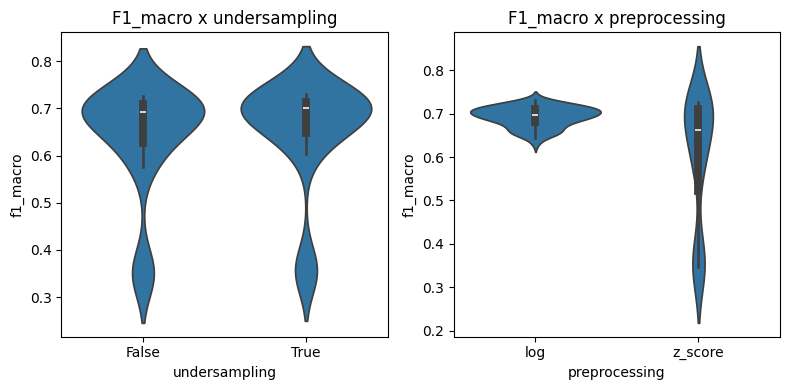

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

for idx, col in enumerate(['undersampling','preprocessing']):
    sns.violinplot(data=df_results, x=col, y='f1_macro', ax=axes[idx])
    axes[idx].set_title(f'{'F1_macro'} x {col}')


plt.tight_layout()
plt.show()

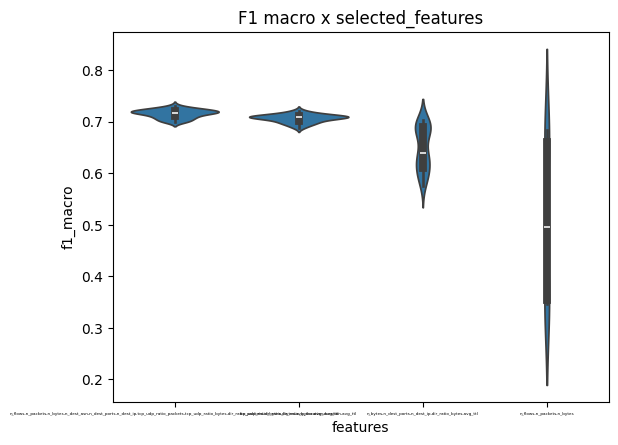

In [10]:
sns.violinplot(data=df_results, x='features', y='f1_macro')
plt.title('F1 macro x selected_features')
plt.xticks(fontsize=3)
plt.show()

In [11]:
print(df_results.groupby('features')['f1_macro'].max())

features
n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes,avg_ttl                                                                                                          0.702528
n_flows,n_packets,n_bytes                                                                                                                                       0.683537
n_flows,n_packets,n_bytes,n_dest_asn,n_dest_ports,n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl    0.730671
tcp_udp_ratio_bytes,dir_ratio_bytes,avg_duration,avg_ttl                                                                                                        0.721774
Name: f1_macro, dtype: float64
